In [1]:
#%matplotlib
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib as plt
import matplotlib.pyplot as plt
import seaborn as sns
from pandas.tools.plotting import scatter_matrix
from pandas import DataFrame
#
from sklearn.metrics import explained_variance_score
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.ensemble import RandomForestRegressor
#

In [2]:
import os;
os.chdir("/Users/cesare.chung/Dropbox/2017ML/CHPT-NTHU/Working_Directory_/Rcode/AU2/ENIG/")
print (os.getcwd())

/Users/cesare.chung/Dropbox/2017ML/CHPT-NTHU/Working_Directory_/Rcode/AU2/ENIG


In [3]:
print('Python3: Chinese characters in csv file need to be removed!!! \n')
#df = pd.read_csv("forR.csv")
df = pd.read_csv("forR2NI.csv",encoding="latin-1")

Python3: Chinese characters in csv file need to be removed!!! 



In [4]:
############################################################# Summarizing and Computing Descriptive Statistics
df['AuThick_Average'].corr(df['TIME3132'],method='pearson')

0.98743904390567183

In [5]:
df.shape

(399, 160)

In [6]:
#
df['ERP_EAuThick'].value_counts()
#

15    244
30     61
50     58
20     16
25     14
35      3
10      3
Name: ERP_EAuThick, dtype: int64

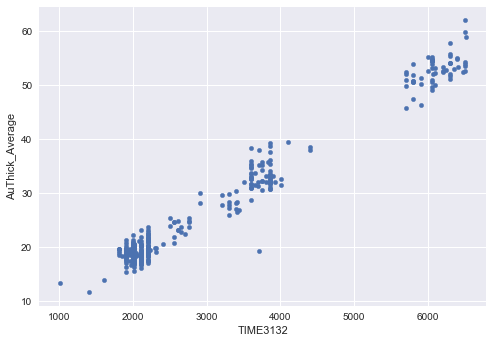

In [7]:
df.plot.scatter(x='TIME3132', y='AuThick_Average');

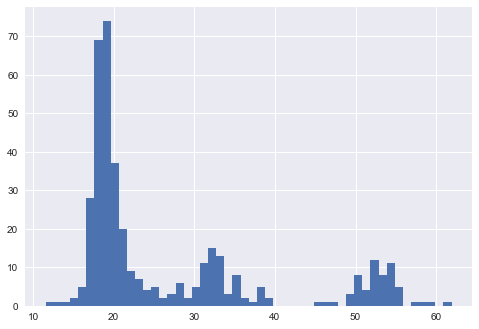

In [8]:
df['AuThick_Average'].hist(bins=50)

ERP_EAuThick
10    Axes(0.125,0.125;0.775x0.755)
15    Axes(0.125,0.125;0.775x0.755)
20    Axes(0.125,0.125;0.775x0.755)
25    Axes(0.125,0.125;0.775x0.755)
30    Axes(0.125,0.125;0.775x0.755)
35    Axes(0.125,0.125;0.775x0.755)
50    Axes(0.125,0.125;0.775x0.755)
Name: AuThick_Average, dtype: object

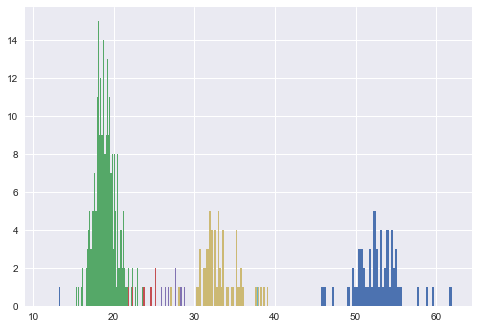

In [9]:
#
h = df.groupby(['ERP_EAuThick'])
h['AuThick_Average'].hist(bins=60)

In [10]:
############################################################# Aggregate
g = df.groupby(['ERP_EAuThick'])
g['AuThick_Average'].var()

ERP_EAuThick
10    1.402854
15    1.930853
20    1.702196
25    1.905426
30    5.478983
35    0.698764
50    8.165687
Name: AuThick_Average, dtype: float64

In [11]:
############################################################# MAPE
#from sklearn.utils import check_array
def MAPE(y_true, y_pred): 
#    y_true, y_pred = check_array(y_true, y_pred)
#    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100
    return np.mean(abs((y_true - y_pred) / y_true)) * 100
#

In [12]:
############################################################# 
import numpy as np
from sklearn import datasets, linear_model
from sklearn.linear_model import LogisticRegression
from sklearn.cross_validation import KFold   #For K-fold cross validation
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier, export_graphviz
from sklearn import metrics
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.cross_validation import cross_val_predict
from sklearn.cross_validation import cross_val_score
import statsmodels.api as sm


/anaconda/envs/py35/lib/python3.5/site-packages/sklearn/cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)
/anaconda/envs/py35/lib/python3.5/site-packages/statsmodels/compat/pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


In [13]:
#
def regression_model(model, data, predictors, outcome):
  #
  X_train,X_test,Y_train,Y_test = cross_validation.train_test_split(data[predictors],data[outcome],test_size=0.2,random_state=0)  
  #
  #Fit the model:
  model.fit(X_train,Y_train)
  #Make predictions on training set:
  predictions = model.predict(X_test)
  #Print accuracy
  print('Results for Testing data: Before running, make sure to split Training and Testing data \n')
  print('Variance Score on test: %.10s' % model.score(X_test, Y_test))
  r2_score_LM = r2_score(Y_test, predictions)
  print("R^2  on test data     : %.10s  "  %  r2_score_LM)
  print("MAPE on test data     : %0.4f"    %  (MAPE(Y_test,predictions)))
  print("MSE  on test data     : %0.4f \n" %  (mean_squared_error(Y_test, predictions)))
  #Equation coefficient and Intercept
#  print('Coefficients: \n')
#  print  model.coef_
  print('Coefficients: %s \n' %       model.coef_[0])
  print('Intercept:    %.10s \n' %    model.intercept_)
  #
  Xi = sm.add_constant(X_train)
  sm_model = sm.OLS(Y_train, Xi)
  sm_model = sm.GLS(Y_train, Xi)
  results = sm_model.fit()
  print('Results:    %s \n' %    results.summary())
  #
  # Create a submission
  submission = pd.DataFrame({"Actual" : Y_test, 
                             "Pred"   : predictions})
#  print submission
#

In [14]:
#
def regression_model(model, data, predictors, outcome):
  #Fit the model:
  model.fit(data[predictors],data[outcome])
  #Make predictions on training set:
  predictions = model.predict(data[predictors])  
  #Print accuracy
  print('Results for Training data: Before running, make sure to only collect Training Set \n')
  print('Variance Score on Training: %.10s' %     model.score(data[predictors],data[outcome]))
  r2_score_LM = r2_score(data[outcome], predictions)
  print("R^2  on Training data     : %.10s" %     r2_score_LM)
  print("MAPE on Training data     : %0.4f" %     (MAPE(data[outcome], predictions)))
  print("MSE  on Training data     : %0.4f \n" %  (mean_squared_error(data[outcome], predictions)))
  #Equation coefficient and Intercept
#  print('Coefficients: \n')
#  print  model.coef_
  print('Coefficients: %s \n' %       model.coef_[0])
  print('Intercept:    %.10s \n' %    model.intercept_)
  #
  Xi = sm.add_constant(data[predictors])
  sm_model = sm.GLS(data[outcome], Xi)
  sm_model = sm.OLS(data[outcome], Xi)
  results = sm_model.fit()
  print('Results:    %s \n' %    results.summary())
  #
  #Create a submission
  submission = pd.DataFrame({"Actual" : data[outcome], 
                             "Pred"   : predictions})
#  print submission

  #Perform k-fold cross-validation with 10 folds  
  kf = KFold(len(data), n_folds=10, shuffle=True, random_state=0)
#  kf = KFold(data.shape[0], n_folds=10, shuffle=True)
#  kf = KFold(data.shape[0], n_folds=10)
  error = []
  for train, test in kf:
    # Filter training data
    train_predictors = (data[predictors].iloc[train,:])
    # The target we're using to train the algorithm.
    train_target = data[outcome].iloc[train]
    
    # Training the algorithm using the predictors and target.
    model.fit(train_predictors, train_target)
    
    pred = model.predict(data[predictors].iloc[test,:])
    #Record error from each cross-validation run    
    error.append( pred - data[outcome].iloc[test] )
    R2_score = r2_score( data[outcome].iloc[test], pred)
    scores_mse = mean_squared_error(data[outcome].iloc[test], pred)
##RESULTS  
  print('Cross-Validation Results: \n')
  print('R^2  for Cross-Validation Result: %0.4f'  % (R2_score))
  print("MAPE for Cross-Validation Result: %0.4f" % (MAPE(data[outcome].iloc[test], pred)))
  print("MSE  for Cross-Validation Result: %0.4f" % (scores_mse))
##RESULTS  
  #Fit the model again so that it can be refered outside the function:
  model.fit(data[predictors],data[outcome]) 
#


In [15]:
#
############################################################# Cross-Validation
from sklearn import datasets, linear_model
from sklearn import cross_validation
from sklearn.linear_model import ElasticNetCV
from sklearn import datasets
from sklearn.linear_model import LassoCV
from sklearn.linear_model import Lasso
from sklearn.linear_model import ElasticNet
from sklearn import svm
from sklearn.svm import SVR
import multiprocessing
from sklearn.svm import SVC
from sklearn.grid_search import GridSearchCV
############################################################# Cross-Validation
#

/anaconda/envs/py35/lib/python3.5/site-packages/sklearn/grid_search.py:42: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. This module will be removed in 0.20.
  DeprecationWarning)


In [16]:
#
df = pd.read_csv("forR2NI.csv",encoding="latin-1")
#
# Training Set
#
df = df.ix[0:300,]
#

/anaconda/envs/py35/lib/python3.5/site-packages/ipykernel_launcher.py:6: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#deprecate_ix
  


In [17]:
df.drop(['REAL_VOITAGE_21','REAL_CURRENT_21','REAL_VOITAGE_22','REAL_CURRENT_22'], axis=1, inplace=True)
df.drop(['MACHINE_ID','EVENTDATETIME','END_TIME','LOTNO','PART_NUMBER'], axis=1, inplace=True)
df.drop(['IN_TIME','ERP_QTY'], axis=1, inplace=True)


In [18]:
#
def order(frame,var):
    varlist =[w for w in frame.columns if w not in var]
    frame = frame[var+varlist]
    return frame 
#

In [19]:
df1 = df.ix[:,1:149]
#df1 = df.ix[:,1:148]
#df1 = df.ix[:,1:147]

/anaconda/envs/py35/lib/python3.5/site-packages/ipykernel_launcher.py:1: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#deprecate_ix
  """Entry point for launching an IPython kernel.


In [21]:
df1.head()

,WORK_TYPE,QUANTITY,TARGET_NO,AREA,OPERATOR,NI_TIME,GOLD_TIME,AC_GOLD_TIME,SET_DIPPING_01,SET_DIPPING_02,...,TIME2627,TIME3132,TEMPERATURE1213,TEMPERATURE2122,TEMPERATURE2627,TEMPERATURE3132,HEATING2122,HEATING3132,AuThick_Average,NITHICK_Average
0,±ß¯Z,2,1,195,´ú¸Õ¤H­û,2500,480,2100,300,60,...,482,2101,25.9,78.3,85.0,51.1,81.0,54.7,20.958046,166.412870
1,¦­¯Z,1,1,98,´ú¸Õ¤H­û,2600,480,2200,300,60,...,482,2201,27.7,78.4,85.3,51.2,80.6,54.5,21.539106,170.507798
2,±ß¯Z,1,1,8,´ú¸Õ¤H­û,2400,480,3850,300,60,...,482,3851,27.9,78.4,85.3,51.2,80.9,54.6,37.606258,176.094906
3,±ß¯Z,1,1,77,´ú¸Õ¤H­û,2400,480,2200,300,60,...,481,2202,27.4,78.5,84.5,51.1,81.3,55.4,23.053732,170.894772
4,±ß¯Z,2,1,272,´ú¸Õ¤H­û,2400,480,2200,300,60,...,482,2202,27.2,78.4,85.2,51.1,81.3,55.1,20.961532,147.316336


In [22]:
df1.drop(df1.loc[:, "SET_DIPPING_01":"PRESENT_DIPPING_04"], axis=1, inplace=True)
df1.drop(df1.loc[:, "PRESENT_DIPPING_34":"PRESENT_DIPPING_36"], axis=1, inplace=True)
df1.drop(['AC_GOLD_TIME'], axis=1, inplace=True)

In [23]:
df1 = order(df1,['AuThick_Average','TIME3132','PRESENT_DIPPING_12','PRESENT_DIPPING_28','PRESENT_DIPPING_32','TIME2122','PRESENT_DIPPING_22','PRESENT_DIPPING_33','ERP_ENiThick','AREA','NI_TIME'])

In [24]:
df1.drop(['WORK_TYPE'], axis=1, inplace=True)

In [25]:
df1.drop(['OPERATOR'], axis=1, inplace=True)

In [26]:
df1=df1.loc[:, "TIME3132":"NITHICK_Average"]

In [27]:
df1.head()

,TIME3132,PRESENT_DIPPING_12,PRESENT_DIPPING_28,PRESENT_DIPPING_32,TIME2122,PRESENT_DIPPING_22,PRESENT_DIPPING_33,ERP_ENiThick,AREA,NI_TIME,...,ERP_EBackareaSQ,TIME1213,TIME2627,TEMPERATURE1213,TEMPERATURE2122,TEMPERATURE2627,TEMPERATURE3132,HEATING2122,HEATING3132,NITHICK_Average
0,2101,0,32,2101,2501,0,34,200,195,2500,...,72.835,17,482,25.9,78.3,85.0,51.1,81.0,54.7,166.412870
1,2201,0,32,2201,2606,0,91,200,98,2600,...,72.835,17,482,27.7,78.4,85.3,51.2,80.6,54.5,170.507798
2,3851,0,32,3851,2404,0,34,0,8,2400,...,7.895,17,482,27.9,78.4,85.3,51.2,80.9,54.6,176.094906
3,2202,0,33,2202,2403,0,91,200,77,2400,...,49.780,17,481,27.4,78.5,84.5,51.1,81.3,55.4,170.894772
4,2202,0,31,2202,2403,0,91,200,272,2400,...,83.172,17,482,27.2,78.4,85.2,51.1,81.3,55.1,147.316336


In [28]:
model = svm.SVR()
model = svm.SVR(C=1000, epsilon=0.0001)
model = svm.SVR(kernel='linear')
model = Lasso(random_state=0)
#
model = Lasso(alpha = 0.1)
model = ElasticNet(alpha=10, l1_ratio=1)
model = ElasticNetCV(max_iter=1000, cv=20, l1_ratio = [.1, .5, .7, .9, .95, .99, 1])
model = linear_model.LinearRegression()

In [29]:
outcome_var = 'AuThick_Average'
predictor_var = ['TIME3132']
predictor_var = list(df1.columns.values)

regression_model(model, df,predictor_var,outcome_var)

Results for Training data: Before running, make sure to only collect Training Set 

Variance Score on Training: 0.98958648
R^2  on Training data     : 0.98958648
MAPE on Training data     : 3.5863
MSE  on Training data     : 1.6087 

Coefficients: 0.00441338328692 

Intercept:    10.3920091 

Results:                                OLS Regression Results                            
Dep. Variable:        AuThick_Average   R-squared:                       0.990
Model:                            OLS   Adj. R-squared:                  0.987
Method:                 Least Squares   F-statistic:                     380.1
Date:                Sun, 05 Nov 2017   Prob (F-statistic):          6.16e-208
Time:                        10:09:10   Log-Likelihood:                -498.65
No. Observations:                 301   AIC:                             1119.
Df Residuals:                     240   BIC:                             1345.
Df Model:                          60                         

In [30]:
predictor_var[0:18]
predictor_var[16]

'PRESENT_DIPPING_08'

In [31]:
list(df1.columns.values)

['TIME3132',
 'PRESENT_DIPPING_12',
 'PRESENT_DIPPING_28',
 'PRESENT_DIPPING_32',
 'TIME2122',
 'PRESENT_DIPPING_22',
 'PRESENT_DIPPING_33',
 'ERP_ENiThick',
 'AREA',
 'NI_TIME',
 'QUANTITY',
 'TARGET_NO',
 'GOLD_TIME',
 'PRESENT_DIPPING_05',
 'PRESENT_DIPPING_06',
 'PRESENT_DIPPING_07',
 'PRESENT_DIPPING_08',
 'PRESENT_DIPPING_09',
 'PRESENT_DIPPING_10',
 'PRESENT_DIPPING_11',
 'PRESENT_DIPPING_13',
 'PRESENT_DIPPING_14',
 'PRESENT_DIPPING_15',
 'PRESENT_DIPPING_16',
 'PRESENT_DIPPING_17',
 'PRESENT_DIPPING_18',
 'PRESENT_DIPPING_19',
 'PRESENT_DIPPING_20',
 'PRESENT_DIPPING_21',
 'PRESENT_DIPPING_23',
 'PRESENT_DIPPING_24',
 'PRESENT_DIPPING_25',
 'PRESENT_DIPPING_26',
 'PRESENT_DIPPING_27',
 'PRESENT_DIPPING_29',
 'PRESENT_DIPPING_30',
 'PRESENT_DIPPING_31',
 'TEMPERATURE_01',
 'TEMPERATURE_02',
 'TEMPERATURE_05',
 'TEMPERATURE_12',
 'TEMPERATURE_13',
 'TEMPERATURE_17',
 'TEMPERATURE_18',
 'TEMPERATURE_21',
 'TEMPERATURE_22',
 'TEMPERATURE_26',
 'TEMPERATURE_27',
 'TEMPERATURE_31',


In [35]:
model = RandomForestRegressor(n_estimators=1000,
                                random_state=0,
                                n_jobs=-1)
regression_model(model, df,predictor_var,outcome_var)


Results for Training data: Before running, make sure to only collect Training Set 

Variance Score on Training: 0.99767094
R^2  on Training data     : 0.99767094
MAPE on Training data     : 1.6125
MSE  on Training data     : 0.3598 



AttributeError: 'RandomForestRegressor' object has no attribute 'coef_'

 1) ERP_EAuThick                   0.579703
 2) TIME3132                       0.234482
 3) PRESENT_DIPPING_31             0.166442
 4) HEATING2122                    0.001920
 5) PRESENT_DIPPING_32             0.001792
 6) NITHICK_Average                0.001330
 7) TIME2122                       0.000884
 8) CONDUCTIVITY_20                0.000849
 9) PRESENT_DIPPING_14             0.000716
10) AREA                           0.000654
11) TEMPERATURE_21                 0.000652
12) TEMPERATURE_27                 0.000594
13) CONDUCTIVITY_35                0.000518
14) ERP_EBackareaSQ                0.000460
15) TEMPERATURE_32                 0.000447
16) TEMPERATURE1213                0.000409
17) CONDUCTIVITY_25                0.000404
18) TEMPERATURE2122                0.000403
19) HEATING_21                     0.000381
20) CONDUCTIVITY_23                0.000377
21) CONDUCTIVITY_30                0.000354
22) ERP_EFrontareaSQ               0.000349
23) TEMPERATURE_02              

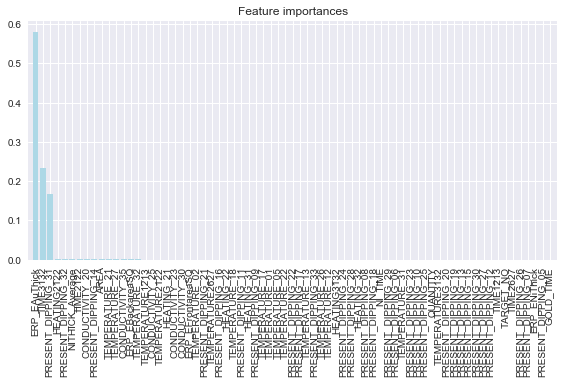

In [36]:
importances = model.feature_importances_

importance = pd.DataFrame(model.feature_importances_, index=predictor_var, columns=["Importance"])

indices = np.argsort(importances)[::-1]
#
featimp = pd.Series(model.feature_importances_, index=predictor_var).sort_values(ascending=False)
#print featimp
#
feat_labels = featimp.index[0:]

for f in range(importance.shape[0]):
    print("%2d) %-*s %f" % (f + 1, 30,feat_labels[f], importances[indices[f]]))

plt.title("Feature importances")
plt.bar(range(importance.shape[0]),importances[indices],color='lightblue',align='center')
plt.xticks(range(importance.shape[0]), feat_labels, rotation=90)
plt.xlim([-1, importance.shape[0]])
plt.tight_layout()
plt.show()


In [37]:
df = pd.read_csv("/Users/cesare.chung/Dropbox/2017ML/EXCEL/winequality-white.csv")

In [38]:
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6


In [39]:
# Training Set
#
df = df.ix[0:3000,]
#
df1 = df
df1 = order(df1,['alcohol'])
df1=df1.loc[:, "fixed acidity":"quality"]

/anaconda/envs/py35/lib/python3.5/site-packages/ipykernel_launcher.py:3: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#deprecate_ix
  This is separate from the ipykernel package so we can avoid doing imports until


In [40]:
df1.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,6
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,6
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,6
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,6
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,6


In [41]:
#
model = svm.SVR()
model = svm.SVR(C=1000, epsilon=0.0001)
model = svm.SVR(kernel='linear')
model = Lasso(random_state=0)
#
model = Lasso(alpha = 0.1)
model = ElasticNet(alpha=10, l1_ratio=1)
model = ElasticNetCV(max_iter=1000, cv=20, l1_ratio = [.1, .5, .7, .9, .95, .99, 1])
model = linear_model.LinearRegression()
#

In [42]:
outcome_var = 'alcohol'
predictor_var = list(df1.columns.values)

regression_model(model, df,predictor_var,outcome_var)

Results for Training data: Before running, make sure to only collect Training Set 

Variance Score on Training: 0.81897788
R^2  on Training data     : 0.81897788
MAPE on Training data     : 3.0987
MSE  on Training data     : 0.2298 

Coefficients: 0.516602699716 

Intercept:    614.017622 

Results:                                OLS Regression Results                            
Dep. Variable:                alcohol   R-squared:                       0.819
Model:                            OLS   Adj. R-squared:                  0.818
Method:                 Least Squares   F-statistic:                     1229.
Date:                Sun, 05 Nov 2017   Prob (F-statistic):               0.00
Time:                        10:11:56   Log-Likelihood:                -2051.4
No. Observations:                3001   AIC:                             4127.
Df Residuals:                    2989   BIC:                             4199.
Df Model:                          11                           

In [43]:
list(df1.columns.values)

['fixed acidity',
 'volatile acidity',
 'citric acid',
 'residual sugar',
 'chlorides',
 'free sulfur dioxide',
 'total sulfur dioxide',
 'density',
 'pH',
 'sulphates',
 'quality']

In [44]:
############################################################# Cross-Validation (Check) winequality-white (--> predict alcohol)
from sklearn.cross_validation import train_test_split
#
df = pd.read_csv("/Users/cesare.chung/Dropbox/2017ML/EXCEL/winequality-white.csv")
df = order(df,['alcohol'])
#
X = df.iloc[:, 1:].values
y = df.iloc[:, 0].values
#
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)
#
model = linear_model.LinearRegression()
model = RandomForestRegressor(n_estimators=100,random_state=0,n_jobs=-1)
#
# CV
shuffle = cross_validation.KFold(len(X_train), n_folds=10, shuffle=True)
# CV R^2
scores = cross_validation.cross_val_score(model, X_train, y_train, cv=shuffle)
scores = cross_validation.cross_val_score(model, X_train, y_train, cv=10)
print('Score     : %s'    % (scores))
print("Mean Score: %0.4f" % (np.mean(scores)))
#
# CV - MSE
scores_mse = cross_validation.cross_val_score(model, X_train, y_train, scoring = 'mean_squared_error' ,cv=shuffle)
print('Score          : %s'    % (scores_mse))
print("MSE: %0.4f (+/- %0.2f)" % (scores_mse.mean(), scores_mse.std()))
# CV - MAE
scores_mae = cross_validation.cross_val_score(model, X_train, y_train, scoring = 'mean_absolute_error',cv=shuffle)
print('Score          : %s'    % (scores_mae))
print("MAE: %0.4f (+/- %0.2f)" % (scores_mae.mean(), scores_mae.std()))
#


Score     : [ 0.90883208  0.90954478  0.93343532  0.93031479  0.92495234  0.92150029
  0.91505209  0.91845046  0.93731309  0.94453579]
Mean Score: 0.9244


/anaconda/envs/py35/lib/python3.5/site-packages/sklearn/metrics/scorer.py:100: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)
/anaconda/envs/py35/lib/python3.5/site-packages/sklearn/metrics/scorer.py:100: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)
/anaconda/envs/py35/lib/python3.5/site-packages/sklearn/metrics/scorer.py:100: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)
/anaconda/envs/py35/lib/python3.5/site-packages/sklearn/metrics/scorer.py:100: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)
/anaconda/en

Score          : [-0.11541732 -0.11475516 -0.11723394 -0.11291456 -0.10904763 -0.12086408
 -0.10272812 -0.11511099 -0.13476564 -0.09030585]
MSE: -0.1133 (+/- 0.01)


/anaconda/envs/py35/lib/python3.5/site-packages/sklearn/metrics/scorer.py:100: DeprecationWarning: Scoring method mean_absolute_error was renamed to neg_mean_absolute_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)
/anaconda/envs/py35/lib/python3.5/site-packages/sklearn/metrics/scorer.py:100: DeprecationWarning: Scoring method mean_absolute_error was renamed to neg_mean_absolute_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)
/anaconda/envs/py35/lib/python3.5/site-packages/sklearn/metrics/scorer.py:100: DeprecationWarning: Scoring method mean_absolute_error was renamed to neg_mean_absolute_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)
/anaconda/envs/py35/lib/python3.5/site-packages/sklearn/metrics/scorer.py:100: DeprecationWarning: Scoring method mean_absolute_error was renamed to neg_mean_absolute_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)
/ana

Score          : [-0.23711782 -0.22132034 -0.24563577 -0.2307915  -0.23474208 -0.23255109
 -0.22620586 -0.23704988 -0.25397175 -0.21259563]
MAE: -0.2332 (+/- 0.01)


/anaconda/envs/py35/lib/python3.5/site-packages/sklearn/metrics/scorer.py:100: DeprecationWarning: Scoring method mean_absolute_error was renamed to neg_mean_absolute_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)


In [45]:
############################################################# Cross-Validation (Check) winequality-white (--> predict alcohol)
#
def test_regression(model):
    scores_mse = cross_validation.cross_val_score(model, X_train , y_train, scoring='mean_squared_error',cv=shuffle)
    print("MSE: %0.4f (+/- %0.2f)" % (scores_mse.mean(), scores_mse.std()))
#
lm = linear_model.LinearRegression()
rf = RandomForestRegressor(n_estimators=100,random_state=0,n_jobs=-1)
svm = svm.SVR(C=1000, epsilon=0.0001)
lasso = Lasso(alpha = 0.1)
#
test_regression(lm)
test_regression(rf)
test_regression(svm)
test_regression(lasso)
#


/anaconda/envs/py35/lib/python3.5/site-packages/sklearn/metrics/scorer.py:100: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)
/anaconda/envs/py35/lib/python3.5/site-packages/sklearn/metrics/scorer.py:100: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)
/anaconda/envs/py35/lib/python3.5/site-packages/sklearn/metrics/scorer.py:100: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)
/anaconda/envs/py35/lib/python3.5/site-packages/sklearn/metrics/scorer.py:100: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)
/anaconda/en

MSE: -0.1326 (+/- 0.02)


/anaconda/envs/py35/lib/python3.5/site-packages/sklearn/metrics/scorer.py:100: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)
/anaconda/envs/py35/lib/python3.5/site-packages/sklearn/metrics/scorer.py:100: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)
/anaconda/envs/py35/lib/python3.5/site-packages/sklearn/metrics/scorer.py:100: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)
/anaconda/envs/py35/lib/python3.5/site-packages/sklearn/metrics/scorer.py:100: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)
/anaconda/en

MSE: -0.1133 (+/- 0.01)


/anaconda/envs/py35/lib/python3.5/site-packages/sklearn/metrics/scorer.py:100: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)
/anaconda/envs/py35/lib/python3.5/site-packages/sklearn/metrics/scorer.py:100: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)
/anaconda/envs/py35/lib/python3.5/site-packages/sklearn/metrics/scorer.py:100: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)
/anaconda/envs/py35/lib/python3.5/site-packages/sklearn/metrics/scorer.py:100: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)
/anaconda/en

MSE: -1.0924 (+/- 0.10)
MSE: -0.8909 (+/- 0.04)


/anaconda/envs/py35/lib/python3.5/site-packages/sklearn/metrics/scorer.py:100: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)
/anaconda/envs/py35/lib/python3.5/site-packages/sklearn/metrics/scorer.py:100: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)
/anaconda/envs/py35/lib/python3.5/site-packages/sklearn/metrics/scorer.py:100: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)
/anaconda/envs/py35/lib/python3.5/site-packages/sklearn/metrics/scorer.py:100: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)
/anaconda/en